<AxesSubplot:>

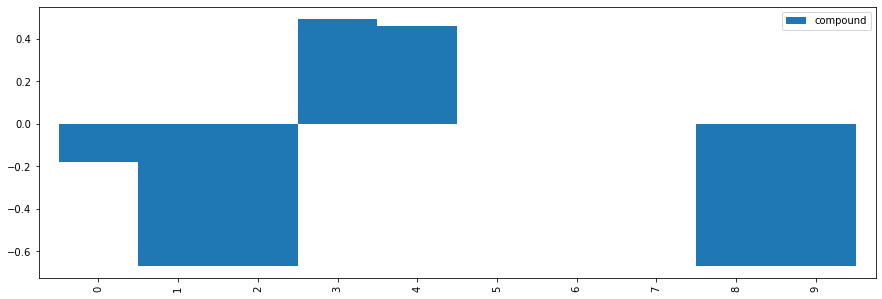

In [4]:
import pandas as pd
import tweepy
import config
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Setup analyzer and twitter api objects
analyzer = SentimentIntensityAnalyzer()
client = tweepy.Client(bearer_token=config.BEARER_TOKEN)

# TODO:
# Add filter for english?? (Needed if vaderSentiment does not support languages other than english)
# Add filter for tweets in a certain time frame (start_time, end_time)

# Retrieve tweets that have a certain phrase in them
tweets = client.search_recent_tweets(query="Coca-Cola")

# Analyse the tweets with vaderSentiment and save the result of each tweet
tweetsWithSent = []
for t in tweets.data:
    text = t.text
    ps = analyzer.polarity_scores(text)
    tweetsWithSent.append({'text': text, 'compound': ps['compound']})

# Plot the result of analysis
# - A high compound can be regarderd as a highly positive tweet (1 being the highest posibile score)
# - A low compound can be regarded as a highly negative tweet (-1 being the lowest possibile score)
# - A compound score of 0 can be regarded as a highly neatral tweet
tweetdf = pd.DataFrame(tweetsWithSent)
tweetdf.plot.bar(figsize=(15, 5), width=1)